### IMPORT PYTHON PACKAGES

In [5]:
# Import the python packages

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

### READING AND UNDERSTANDING THE DATASET

In [6]:
# Read the dataset
telecom_df = pd.read_csv('telecom_churn_data.csv')

In [7]:
# Get the dataset details using head()
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
# Get the shape of the dataset
telecom_df.shape

(99999, 226)

In [9]:
# Describe the dataset
telecom_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
# Print the 'Not-Null Count' and 'Dtype' using info()
telecom_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### DATA CLEANING

#### Check Duplicate Records

In [11]:
# Checking for duplicate records.
telecom_df['mobile_number'].value_counts().sum()

np.int64(99999)

We can see that the number of rows is same as distinct mobile numbers, so there is no duplicate data

#### Treatment for columns with unique values

In [12]:
# Checking columns which have one unique value and dropping them as they will not affect our analysis

# Code block to get the columns with unique values and drop them
telecom_df_columns = telecom_df.columns

for col in telecom_df_columns:
    if telecom_df[col].nunique() == 1:
        telecom_df.drop(col, axis=1, inplace=True)

In [13]:
telecom_df.shape

(99999, 210)

#### Treatment for null values

In [14]:
# Let's check the percentage of null values

round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou

##### Delete the columns where null value percentage is > 40%

In [15]:
# Code block to delete the columns having more than 40% of null values
telecom_df_columns = telecom_df.columns

for col in telecom_df_columns:
    if telecom_df[col].isnull().sum()/len(telecom_df)*100 > 40:
        telecom_df.drop(col, axis=1, inplace=True)

In [16]:
telecom_df.shape

(99999, 170)

##### Filtering High Value Customers

In [17]:
#Deriving Average recharge amount for the month of June and July.
telecom_df['Average_rech_amt_6_and_7'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2

In [18]:
# If the recharge amount for the month of June and July are >= 70th percentile of Average_rech_amt_6n7, such customers are HIGH VALUED CUSTOMERS
telecom_df = telecom_df[(telecom_df['Average_rech_amt_6_and_7'] >= telecom_df['Average_rech_amt_6_and_7'].quantile(0.7))]

In [19]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,

In [20]:
telecom_df.shape

(30011, 171)

In [21]:
# Let's check the percentage of null values

telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('Null')).sort_values('Null', ascending=False)

In [22]:
# Let's handle the missing values month wise

##### September

In [23]:
sep_missing_cols = (telecom_df_missing_columns[telecom_df_missing_columns['Null'] == 5.68].index).to_list()

In [24]:
# Creating a dataframe for MOU for September, for which the the MOU values are null
telecom_df_null_mou_9 = telecom_df[(telecom_df['std_og_t2f_mou_9'].isnull()) & 
                                    (telecom_df['roam_ic_mou_9'].isnull()) & 
                                    (telecom_df['loc_og_mou_9'].isnull()) & 
                                    (telecom_df['loc_ic_t2t_mou_9'].isnull()) & 
                                    (telecom_df['loc_og_t2f_mou_9'].isnull()) & 
                                    (telecom_df['std_ic_t2m_mou_9'].isnull()) & 
                                    (telecom_df['std_ic_mou_9'].isnull()) & 
                                    (telecom_df['loc_og_t2m_mou_9'].isnull()) & 
                                    (telecom_df['std_og_t2t_mou_9'].isnull()) & 
                                    (telecom_df['spl_ic_mou_9'].isnull()) & 
                                    (telecom_df['loc_og_t2t_mou_9'].isnull()) & 
                                    (telecom_df['loc_ic_t2m_mou_9'].isnull()) & 
                                    (telecom_df['std_og_t2m_mou_9'].isnull()) & 
                                    (telecom_df['roam_og_mou_9'].isnull()) & 
                                    (telecom_df['og_others_9'].isnull()) & 
                                    (telecom_df['loc_og_t2c_mou_9'].isnull()) & 
                                    (telecom_df['std_ic_t2t_mou_9'].isnull()) & 
                                    (telecom_df['ic_others_9'].isnull()) & 
                                    (telecom_df['loc_ic_t2f_mou_9'].isnull()) & 
                                    (telecom_df['offnet_mou_9'].isnull()) &
                                    (telecom_df['std_og_mou_9'].isnull()) & 
                                    (telecom_df['spl_og_mou_9'].isnull()) & 
                                    (telecom_df['isd_ic_mou_9'].isnull()) & 
                                    (telecom_df['loc_ic_mou_9'].isnull()) & 
                                    (telecom_df['isd_og_mou_9'].isnull()) & 
                                    (telecom_df['onnet_mou_9'].isnull()) & 
                                    (telecom_df['std_ic_t2f_mou_9'].isnull())
                                     ]

telecom_df_null_mou_9.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4.16,0.00,NaN,0.00,0.00,0.00,NaN,0.49,5.53,1.06,NaN,32.04,67.84,32.16,0.0,0.63,0.0,0.0,NaN,0.00,0.00,0.00,NaN,1.36,1.83,0.00,N

In [25]:
telecom_df_null_mou_9.shape

(1704, 171)

In [26]:
# Droping the records for which MOU for September are null
telecom_df = telecom_df.drop(telecom_df_null_mou_9.index)

In [27]:
telecom_df.shape

(28307, 171)

In [28]:
# Let's check the percentage of null values again

telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('Null')).sort_values('Null', ascending=False)

##### August

In [29]:
aug_missing_cols = (telecom_df_missing_columns[telecom_df_missing_columns['Null'] == 0.55].index).to_list()

In [30]:
# Creating a dataframe for MOU for August, for which the the MOU values are null
telecom_df_null_mou_8 = telecom_df[(telecom_df['std_ic_t2f_mou_8'].isnull()) & 
                                    (telecom_df['std_ic_t2t_mou_8'].isnull()) & 
                                    (telecom_df['std_ic_mou_8'].isnull()) & 
                                    (telecom_df['loc_og_t2t_mou_8'].isnull()) & 
                                    (telecom_df['std_og_t2f_mou_8'].isnull()) & 
                                    (telecom_df['loc_ic_t2f_mou_8'].isnull()) & 
                                    (telecom_df['loc_og_t2m_mou_8'].isnull()) & 
                                    (telecom_df['std_og_t2m_mou_8'].isnull()) & 
                                    (telecom_df['loc_ic_mou_8'].isnull()) & 
                                    (telecom_df['loc_og_t2f_mou_8'].isnull()) & 
                                    (telecom_df['og_others_8'].isnull()) & 
                                    (telecom_df['std_ic_t2m_mou_8'].isnull()) & 
                                    (telecom_df['loc_og_t2c_mou_8'].isnull()) & 
                                    (telecom_df['std_og_t2t_mou_8'].isnull()) & 
                                    (telecom_df['roam_og_mou_8'].isnull()) & 
                                    (telecom_df['loc_og_mou_8'].isnull()) & 
                                    (telecom_df['loc_ic_t2t_mou_8'].isnull()) & 
                                    (telecom_df['roam_ic_mou_8'].isnull()) & 
                                    (telecom_df['loc_ic_t2m_mou_8'].isnull()) & 
                                    (telecom_df['ic_others_8'].isnull()) &
                                    (telecom_df['spl_ic_mou_8'].isnull()) & 
                                    (telecom_df['offnet_mou_8'].isnull()) & 
                                    (telecom_df['isd_og_mou_8'].isnull()) & 
                                    (telecom_df['std_og_mou_8'].isnull()) & 
                                    (telecom_df['onnet_mou_8'].isnull()) & 
                                    (telecom_df['isd_ic_mou_8'].isnull()) & 
                                    (telecom_df['spl_og_mou_8'].isnull())]

telecom_df_null_mou_8.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
375,7002252754,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,6/26/2014,7/23/2014,8/15/2014,9/30/2014,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,19,10,0,4,717,220,0,0,110,50,0,0,6/30/2014,7/28/2014,NaN,9/25/2014,27,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [31]:
telecom_df_null_mou_8.shape

(157, 171)

In [32]:
# Droping the records for which MOU for August are null
telecom_df = telecom_df.drop(telecom_df_null_mou_8.index)

In [33]:
# Let's check the percentage of null values again

telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('Null')).sort_values('Null', ascending=False)

##### July

In [34]:
july_missing_cols = (telecom_df_missing_columns[telecom_df_missing_columns['Null'] == 0.16].index).to_list()

In [35]:
# Creating a dataframe for MOU for August, for which the the MOU values are null
telecom_df_null_mou_7 = telecom_df[(telecom_df['std_ic_mou_7'].isnull()) & 
                                    (telecom_df['std_ic_t2f_mou_7'].isnull()) & 
                                    (telecom_df['isd_ic_mou_7'].isnull()) & 
                                    (telecom_df['std_og_t2f_mou_7'].isnull()) & 
                                    (telecom_df['isd_og_mou_7'].isnull()) & 
                                    (telecom_df['loc_ic_mou_7'].isnull()) & 
                                    (telecom_df['spl_og_mou_7'].isnull()) & 
                                    (telecom_df['loc_ic_t2f_mou_7'].isnull()) & 
                                    (telecom_df['ic_others_7'].isnull()) & 
                                    (telecom_df['std_ic_t2m_mou_7'].isnull()) & 
                                    (telecom_df['std_ic_t2t_mou_7'].isnull()) & 
                                    (telecom_df['loc_ic_t2t_mou_7'].isnull()) & 
                                    (telecom_df['std_og_t2m_mou_7'].isnull()) & 
                                    (telecom_df['loc_ic_t2m_mou_7'].isnull()) & 
                                    (telecom_df['og_others_7'].isnull()) & 
                                    (telecom_df['std_og_mou_7'].isnull()) & 
                                    (telecom_df['loc_og_t2t_mou_7'].isnull()) & 
                                    (telecom_df['loc_og_mou_7'].isnull()) & 
                                    (telecom_df['onnet_mou_7'].isnull()) & 
                                    (telecom_df['offnet_mou_7'].isnull()) &
                                    (telecom_df['roam_ic_mou_7'].isnull()) & 
                                    (telecom_df['roam_og_mou_7'].isnull()) & 
                                    (telecom_df['loc_og_t2m_mou_7'].isnull()) & 
                                    (telecom_df['loc_og_t2f_mou_7'].isnull()) & 
                                    (telecom_df['loc_og_t2c_mou_7'].isnull()) & 
                                    (telecom_df['spl_ic_mou_7'].isnull()) & 
                                    (telecom_df['std_og_t2t_mou_7'].isnull())]

telecom_df_null_mou_7.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
5616,7001238202,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.0,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.0,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.0,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.0,NaN,0.0,0.13,81.29,NaN,28.79,41.23,0.0,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,6/17/2014,7/30/2014,8/27/2014,9/30/2014,250,0,130,250,0.00,0.00,11.26,83.32,0.00,0.00,79.94,668.40,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.00,0.00,163.39,778.0
9021,7000563525,266.914,722.042,1078.905,247.032,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.0,NaN,NaN,0.00,0.0,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,1.59,0.00,NaN,NaN,24.11,0.00,NaN,NaN,3.78,2.98,NaN,NaN,29.49,2.98,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.0,29.49,2.98,NaN,NaN,0.0,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,3,5,7,2,250,756,1306,252,250,252,400,252,6/8/

In [36]:
telecom_df_null_mou_7.shape

(44, 171)

In [37]:
# Droping the records for which MOU for July are null
telecom_df = telecom_df.drop(telecom_df_null_mou_7.index)

In [38]:
telecom_df.shape

(28106, 171)

In [39]:
# Let's check the percentage of null values again

telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('Null')).sort_values('Null', ascending=False)

##### June

In [40]:
jun_missing_cols = (telecom_df_missing_columns[telecom_df_missing_columns['Null'] == 0.41].index).to_list()

In [41]:
# Creating a dataframe for MOU for August, for which the the MOU values are null
telecom_df_null_mou_6 = telecom_df[(telecom_df['loc_ic_mou_6'].isnull()) & 
                                    (telecom_df['spl_og_mou_6'].isnull()) & 
                                    (telecom_df['loc_og_t2c_mou_6'].isnull()) & 
                                    (telecom_df['loc_og_mou_6'].isnull()) & 
                                    (telecom_df['std_og_t2t_mou_6'].isnull()) & 
                                    (telecom_df['std_og_t2m_mou_6'].isnull()) & 
                                    (telecom_df['std_og_t2f_mou_6'].isnull()) & 
                                    (telecom_df['std_og_mou_6'].isnull()) & 
                                    (telecom_df['isd_og_mou_6'].isnull()) & 
                                    (telecom_df['og_others_6'].isnull()) & 
                                    (telecom_df['loc_og_t2m_mou_6'].isnull()) & 
                                    (telecom_df['ic_others_6'].isnull()) & 
                                    (telecom_df['loc_ic_t2t_mou_6'].isnull()) & 
                                    (telecom_df['isd_ic_mou_6'].isnull()) & 
                                    (telecom_df['loc_ic_t2m_mou_6'].isnull()) & 
                                    (telecom_df['spl_ic_mou_6'].isnull()) & 
                                    (telecom_df['loc_ic_t2f_mou_6'].isnull()) & 
                                    (telecom_df['std_ic_t2t_mou_6'].isnull()) & 
                                    (telecom_df['std_ic_mou_6'].isnull()) & 
                                    (telecom_df['std_ic_t2m_mou_6'].isnull()) &
                                    (telecom_df['loc_og_t2f_mou_6'].isnull()) & 
                                    (telecom_df['std_ic_t2f_mou_6'].isnull()) & 
                                    (telecom_df['roam_og_mou_6'].isnull()) & 
                                    (telecom_df['onnet_mou_6'].isnull()) & 
                                    (telecom_df['roam_ic_mou_6'].isnull()) & 
                                    (telecom_df['offnet_mou_6'].isnull()) & 
                                    (telecom_df['loc_og_t2t_mou_6'].isnull())]

telecom_df_null_mou_6.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
77,7001328263,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,6/17/2014,7/27/2014,8/27/2014,9/24/2014,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,43.76,96.73,56.86,0.0,185.14,219.59,129.19,NaN,0.0,0.0,0.0,NaN,64.56,18.31,9.96,NaN,0.0,0.00,0.0,4,12,24,20,0,970,1104,1214,0,154

In [42]:
telecom_df_null_mou_6.shape

(115, 171)

In [43]:
# Droping the records for which MOU for June are null
telecom_df = telecom_df.drop(telecom_df_null_mou_6.index)

In [44]:
telecom_df.shape

(27991, 171)

In [45]:
# Let's check the percentage of null values again

telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('Null')).sort_values('Null', ascending=False)

#### Deleting the date columns as the date columns are not required in our analysis

In [46]:
# List the date columns
date_cols = [k for k in telecom_df.columns.to_list() if 'date' in k]
print(date_cols) 

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [47]:
# Dropping date columns
telecom_df = telecom_df.drop(date_cols, axis=1)

#### Tag Churners

Customers are tagged **churned** based on the fourth month as below:
* Customers that did not make any calls or did not receive/have any incoming calls
* Customers who did not use mobile internet in the churn phase

In [48]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.0,1.91,0.0,423.81,68.09,474.41,213.91,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6,4,11,7,507,253

In [49]:
telecom_df['churn'] = np.where((telecom_df['total_ic_mou_9']==0) & (telecom_df['total_og_mou_9']==0) & (telecom_df['vol_2g_mb_9']==0) & (telecom_df['vol_3g_mb_9']==0), 1, 0)

In [50]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7,churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.0,1.91,0.0,423.81,68.09,474.41,213.91,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6,4,11,7

##### Delete all the attributes corresponding to the churn phase

In [51]:
# List the columns for churn month: September
column_9 = [col for col in telecom_df.columns.to_list() if '_9' in col]

In [52]:
# Deleting the september month columns
telecom_df = telecom_df.drop(column_9, axis=1)

In [53]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6_and_7,churn
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.

In [54]:
# Deleting the sep_vbc_3g column
telecom_df = telecom_df.drop('sep_vbc_3g', axis=1)

In [55]:
telecom_df.shape

(27991, 127)

##### Checking churn percentage

In [56]:
round(100*telecom_df['churn'].mean(),2)

np.float64(3.39)

We can see that the churn percentage is very low at 3.39. This shows that we have an **imbalanced class**. This needs to be handled.

### FEATURE ENGINEERING

#### Derive New Features

In [57]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,churn
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,

In [58]:
telecom_df.shape

(27991, 127)

In [59]:
col = [col for col in telecom_df.columns if '_6' not in col and '_7' not in col and '_8' not in col]
col

['mobile_number', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn']

**Some of the derived features that can be created are:**
* Reduction in recharge amount
* Reduction in recharge number
* Reduction in mobile internet usage
* Reduction in average revenue per user
* Reduction in the MOU of the customer

#### Derive new column to check reduction/increment in recharge amount

In [60]:
# Average recharge_amount in good phase
telecom_df['avg_rech_amt_good'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2

In [61]:
# Difference of good phase recharge amount and action phase recharge amount
telecom_df['diff_rech_amt'] = telecom_df['avg_rech_amt_good'] - telecom_df['total_rech_amt_8']

In [62]:
# Checking if recharge_amount has decreased in action phase
telecom_df['decrease_rech_amt_action'] = np.where((telecom_df['diff_rech_amt'] < 0), 1, 0) 

In [63]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,churn,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,519.0,399.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,380.0,-337.0,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,459.0,299.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.9

In [64]:
telecom_df['decrease_rech_amt_action'].mean()

np.float64(0.40384409274409633)

#### Derive new column to check reduction in the MOU

In [65]:
#Total mou at good phase incoming and outgoing
telecom_df['total_mou_good_phase'] = (telecom_df['total_og_mou_6'] + telecom_df['total_ic_mou_6'] + telecom_df['total_og_mou_7'] + telecom_df['total_ic_mou_7'])

In [66]:
# Avg. mou at good phase
telecom_df['avg_mou_good'] = (telecom_df['total_mou_good_phase'])/2

In [67]:
# Total. mou at action phase
telecom_df['total_mou_action'] = telecom_df['total_ic_mou_8'] + telecom_df['total_og_mou_8']

In [68]:
# Checking if the mou has decreased in action phase
telecom_df['decrease_mou_action'] = np.where(((telecom_df['avg_mou_good'] - telecom_df['total_mou_action']) < 0), 1, 0)

In [69]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,churn,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,total_mou_good_phase,avg_mou_good,total_mou_action,decrease_mou_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,519.0,399.0,0,1072.37,536.185,188.10,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,380.0,-337.0,1,2240.69,1120.345,2159.79,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.

#### Derive new column to check Reduction in average revenue per user

In [70]:
#Checking  the average revenue per customer decreased from good phase to action phase
#average arpu in good phase
telecom_df['good_phase_arpu'] = (telecom_df['arpu_6'] + telecom_df['arpu_7']) / 2
# Checking if arpu has decreased in action phase
telecom_df["arpu_decrease_action_phase"] = np.where(((telecom_df['good_phase_arpu'] - telecom_df['arpu_8']) < 0 ),1 ,0)
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,churn,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,total_mou_good_phase,avg_mou_good,total_mou_action,decrease_mou_action,good_phase_arpu,arpu_decrease_action_phase
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,519.0,399.0,0,1072.37,536.185,188.10,0,435.4720,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,380.0,-337.0,1,2240.69,1120.345,2159.79,1,349.2585,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.

#### Derive new column to check Reduction in recharge number

In [71]:
#Reduction in recharge number 
#Average in recharge number in good phase
telecom_df['good_phase_rech_num'] = (telecom_df['total_rech_num_7'] + telecom_df['total_rech_num_6']) / 2

# Checking if rech_num has decreased in action phase
telecom_df['decrease_rech_num_action'] = np.where(((telecom_df['good_phase_rech_num'] - telecom_df['total_rech_num_8']) < 0), 1, 0)

#### Derive new column to check reduction in mobile internet usage

In [72]:
# VBC in good phase
telecom_df['avg_vbc_3g_good'] = (telecom_df['jun_vbc_3g'] + telecom_df['jul_vbc_3g'])/2

In [73]:
# Difference of good and action phase VBC
telecom_df['diff_vbc'] = telecom_df['avg_vbc_3g_good'] - telecom_df['aug_vbc_3g']

In [74]:
# Checking whether the VBC has decreased on the action month
telecom_df['decrease_vbc_action'] = np.where(telecom_df['diff_vbc'] < 0 , 1, 0)

### EDA

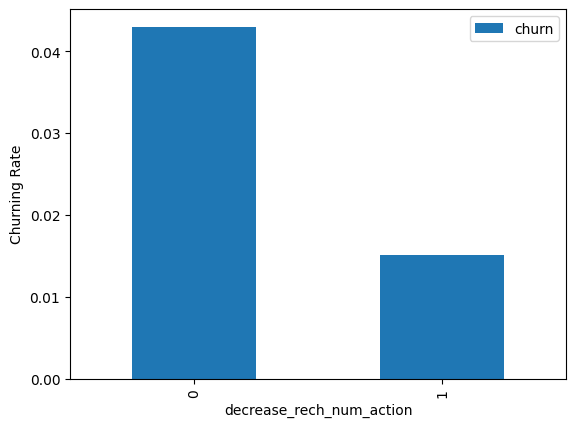

In [75]:
#Churn rate as per decrease in recharge numbers
telecom_df.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('Churning Rate')
plt.show()

**Insights:**:
The churn rate is more for the customers, whose number of recharge in the action phase is less than the number in good phase.

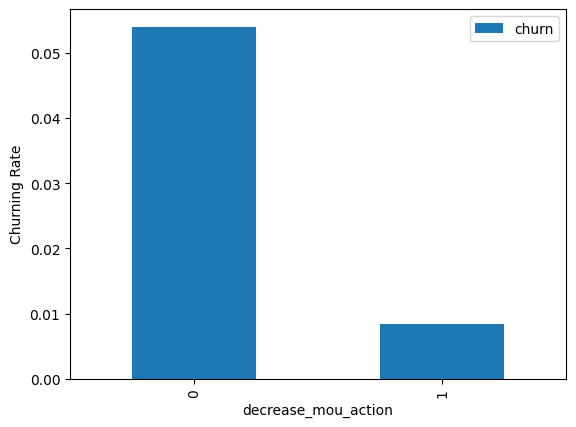

In [76]:
#Churn rate as per decrease in mou of both incoming and outgoing 
telecom_df.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('Churning Rate')
plt.show()

**Insights:**
The churn rate is more for the customers, where mou in the action phase is less than the number in good phase.

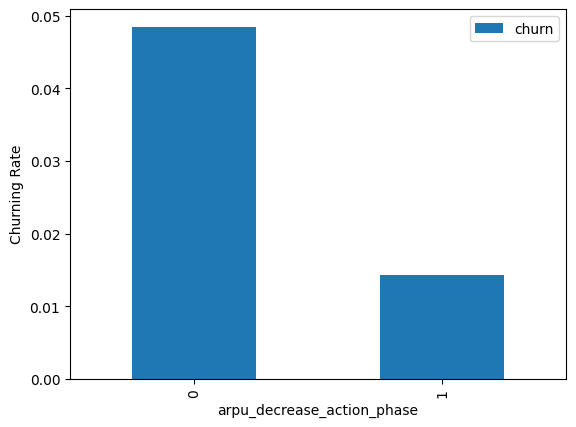

In [77]:
telecom_df.pivot_table(values='churn', index='arpu_decrease_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('Churning Rate')
plt.show()

**Insights:** The churn rate is more for the customers, where arpu in the action phase is less than the number in good phase.

<Axes: xlabel='total_rech_amt_8', ylabel='total_rech_num_8'>

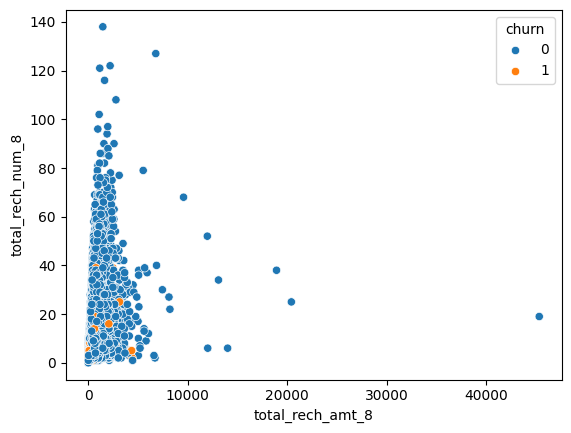

In [78]:
#Relationship of recharge amount and number of recharge in action month
sns.scatterplot(x ='total_rech_amt_8',y='total_rech_num_8', hue='churn' , data = telecom_df)

In [79]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [80]:
recharge_amnt_columns =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'Average_rech_amt_6_and_7',
 'avg_rech_amt_good',
 'diff_rech_amt',
 'decrease_rech_amt_action']

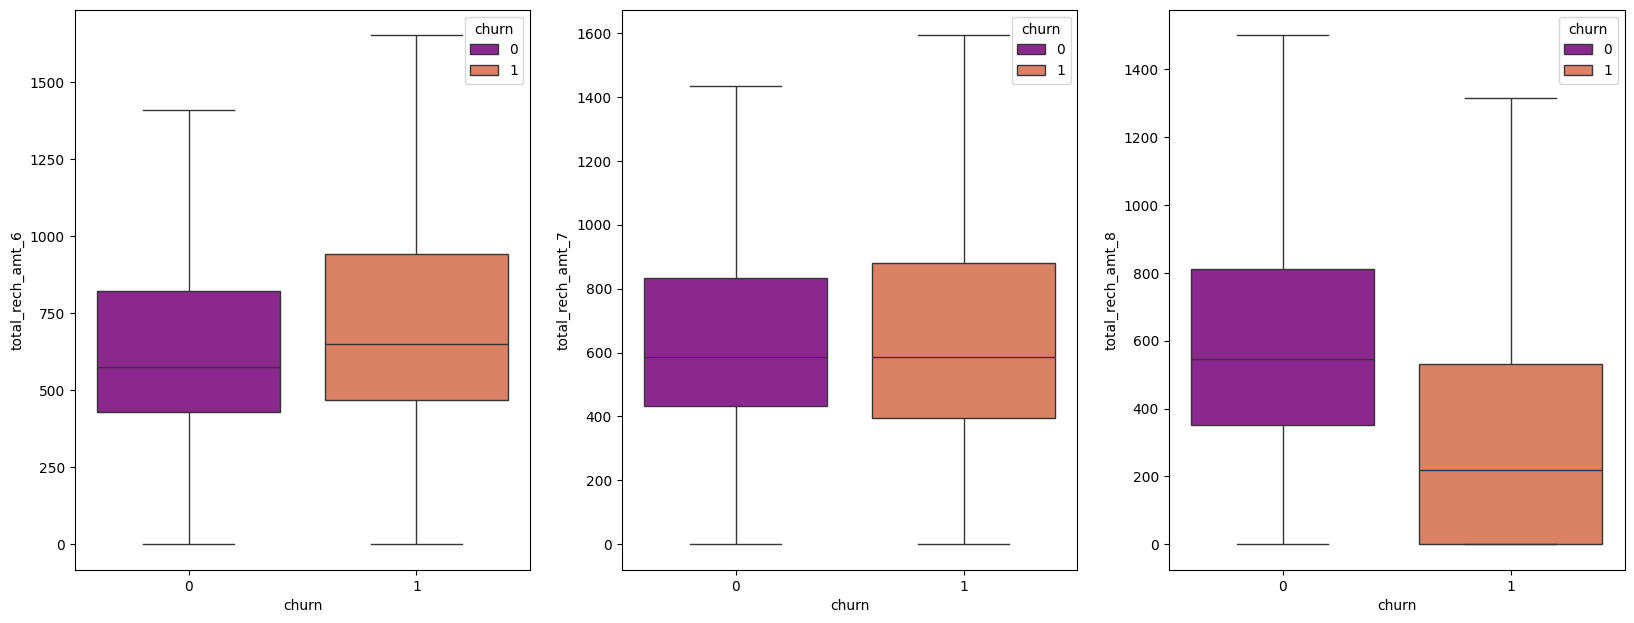

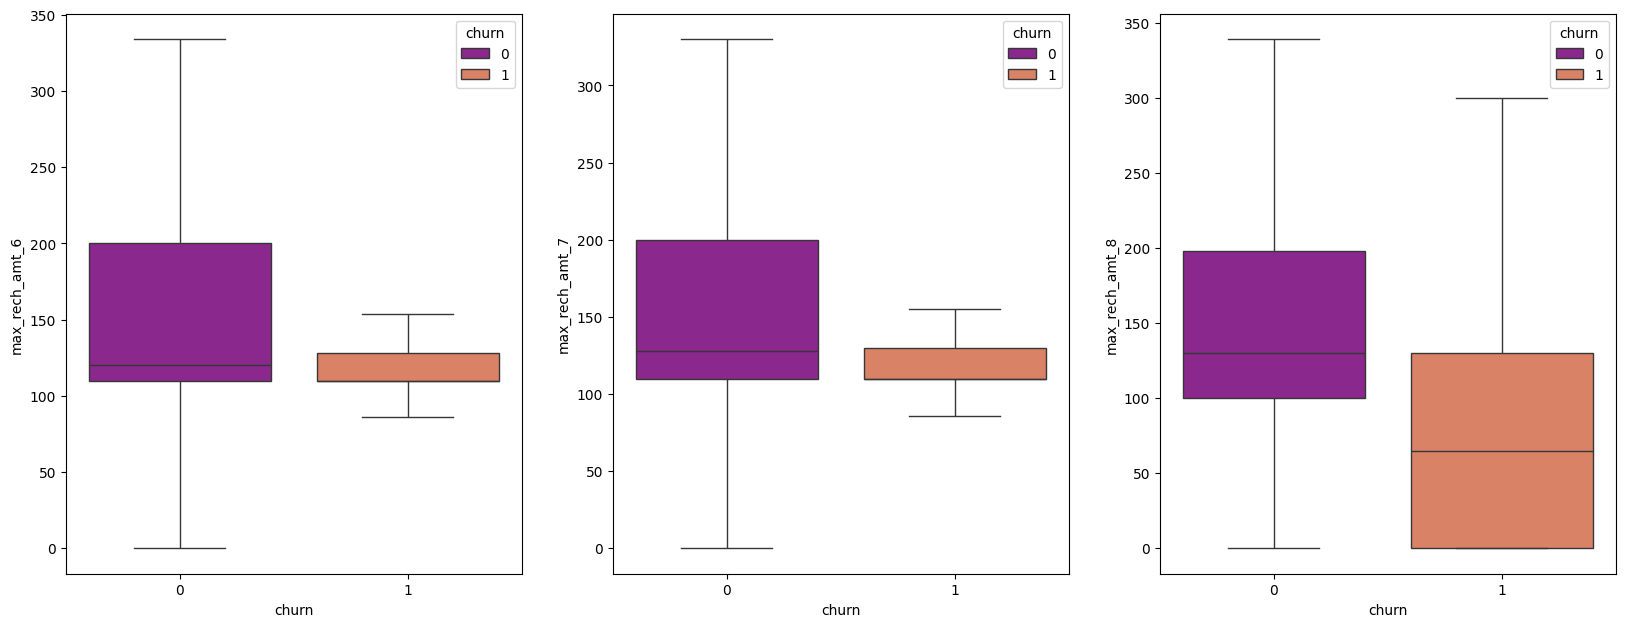

In [81]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')


we can observe that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.

[Text(0.5, 0, 'Action phase MOU')]

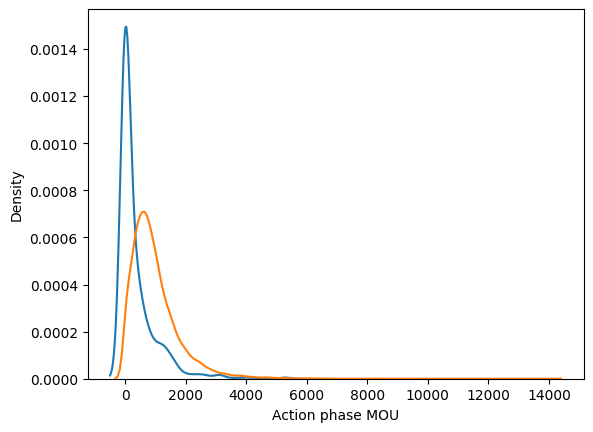

In [82]:
#Analysis of the minutes of usage MOU  in the action phase
# Creating churn dataframe
Data_churn = telecom_df[telecom_df['churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = telecom_df[telecom_df['churn'] == 0]

# Distribution plot
ax = sns.distplot(Data_churn['total_mou_action'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_action'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')


Higher the MOU, lesser the churn probability.

### TRAIN-TEST SPLIT

In [83]:
#Import the libraries
from sklearn.model_selection import train_test_split

In [84]:
#Creating X dataframe with feature variables and y with target variable
X = telecom_df.drop(['churn' , 'mobile_number'] , axis = 1)

y = telecom_df['churn']

In [85]:
#split the data in train and test

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.7, test_size = 0.3 , random_state = 100)

### HANDLING THE DATA IMBALANCE

In [86]:
sm = SMOTE(random_state = 42)

In [87]:
# fitting train set 
X_train , y_train = sm.fit_resample(X_train , y_train)

### FEATURE SCALING

In [88]:
# Instantiate the Scaler
scaler = StandardScaler()

In [89]:
num_cols = X_train.columns.to_list()
num_cols.remove('decrease_mou_action')
num_cols.remove('arpu_decrease_action_phase')
num_cols.remove('decrease_rech_num_action')
num_cols.remove('decrease_rech_amt_action')
num_cols.remove('decrease_vbc_action')

In [90]:
# Fit the train data into scaler and transform
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [91]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,total_mou_good_phase,avg_mou_good,total_mou_action,decrease_mou_action,good_phase_arpu,arpu_decrease_action_phase,good_phase_rech_num,decrease_rech_num_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,-0.923001,-0.132797,-0.475783,-0.703391,-0.659772,-0.540000,-0.924442,-0.899358,-0.723858,-0.255323,-0.240828,-0.289215,-0.305469,-0.361367,-0.378757,-0.378034,-0.330531,-0.301144,-0.649995,-0.641712,-0.541034,-0.274069,-0.261383,-0.246878,-0.177619,-0.253091,-0.224245,-0.665171,-0.626435,-0.538370,-0.565727,-0.529557,-0.405061,-0.626227,-0.591026,-0.434107,-0.153009,-0.138240,-0.124694,-0.834998,-0.777991,-0.558804,-0.036067,-0.034196,-0.030962,-0.318137,-0.339419,-0.252843,-0.303295,-0.015125,-0.023611,-1.093152,-1.019568,-0.752154,-0.388369,-0.368548,-0.209877,-0.540693,-0.532715,-0.416471,-0.295310,-0.273074,-0.239204,-0.612892,-0.593711,-0.422695,-0.224925,-0.198266,-0.197299,-0.357040,-0.311747,-0.248119,-0.131328,0.004241,-0.099855,-0.399142,-0.332741,-0.301369,-0.715410,-0.663144,-0.490263,-0.359888,-0.122135,-0.1975,-0.147732,-0.147930,-0.119213,-0.024663,-0.052940,-0.070874,-1.053264,-0.789517,-0.806014,-0.902055,-0.130713,-0.424682,0.622713,0.589681,0.767379,1.185058,1.310565,1.339208,-0.244297,0.592602,1.041634,1.327130,2.896711,1.770350,-0.248002,-0.246733,-0.231135,-0.248029,-0.266355,-0.263563,2.077348,3.948613,2.036347,-0.127524,-0.133576,-0.113436,1.048647,5.265520,6.157469,-0.258364,-0.580599,-0.580599,-0.075812,0,-1.315408,-1.315408,-0.803847,1,-0.580636,0,-1.040433,0,3.294746,-2.792767,1
1,-0.134439,0.008324,-0.009725,-0.405527,-0.528434,-0.318629,-0.173544,-0.434552,0.215108,-0.255323,-0.240828,-0.210003,-0.305469,-0.361367,-0.250644,0.519354,0.021632,0.220157,1.244558,0.434675,1.116336,-0.109748,0.949332,1.490854,-0.177619,-0.253091,1.939652,1.114337,0.336026,0.920489,-0.565727,-0.528842,-0.405061,-0.626227,-0.591026,-0.426220,-0.153009,-0.138240,-0.124694,-0.834998,-0.777454,-0.553987,-0.036067,-0.034196,-0.030962,-0.279915,-0.172144,0.513963,0.323257,-0.015125,-0.023611,-0.359672,-0.611076,-0.029201,-0.064892,0.126934,0.418196,1.183883,0.532779,1.061030,-0.228053,0.203660,-0

In [92]:
# Transform the test dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6_and_7,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,total_mou_good_phase,avg_mou_good,total_mou_action,decrease_mou_action,good_phase_arpu,arpu_decrease_action_phase,good_phase_rech_num,decrease_rech_num_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
7634,-0.347414,-0.829860,-0.722800,-0.644910,-0.619073,-0.516381,-0.196939,-0.479393,-0.291457,-0.255323,-0.240828,-0.278233,-0.305469,-0.361367,-0.372007,-0.268853,-0.243173,-0.276736,0.456847,0.126248,-0.129116,-0.186190,-0.261383,-0.150477,-0.177619,-0.184731,-0.224245,0.120876,-0.094631,-0.257105,-0.542394,-0.519805,-0.389853,-0.320917,-0.468561,-0.159959,-0.153009,-0.13824,-0.124694,-0.618410,-0.692174,-0.380412,-0.036067,-0.034196,-0.030962,-0.227696,0.072013,-0.252843,0.384499,-0.015125,-0.023611,-0.556204,-0.702659,-0.463046,0.280581,-0.138185,-0.343812,0.128596,0.216187,-0.329457,-0.054451,-0.205917,-0.062901,0.217832,0.051404,-0.400015,-0.210983,-0.156475,-0.183716,-0.322122,-0.280012,-0.248119,-0.107459,-0.101801,-0.099855,-0.363845,-0.300375,-0.294816,-0.009496,-0.122613,-0.468891,-0.359888,-0.122135,-0.1975,-0.147732,-0.14793,-0.119213,-0.077788,-0.088277,-0.070874,-0.613102,-0.674607,-0.438172,-0.319881,-0.908245,-0.699822,-0.280384,-0.288132,-0.203474,0.096746,-0.748343,-0.542004,-0.244297,-0.238499,-0.201391,-0.249618,-0.248318,-0.238571,-0.248002,-0.246733,-0.231135,-0.248029,-0.266355,-0.263563,-0.223578,-0.216669,-0.215608,-0.127524,-0.133576,-0.113436,0.195373,-0.256510,-0.258129,-0.258364,-0.685054,-0.685054,0.170674,0,-0.647435,-0.647435,-0.560225,0,-0.646105,0,-0.732416,0,-0.279697,-0.018768,0
40466,-0.687932,-0.485012,0.159755,-0.295127,-0.227936,0.351211,-0.692732,-0.644679,-0.367381,0.937163,0.871975,0.487802,1.906860,2.119897,0.697212,-0.378034,-0.336543,-0.218734,-0.649995,-0.642234,-0.509729,-0.274069,-0.261383,-0.246878,-0.177619,-0.253091,-0.224245,-0.665171,-0.630667,-0.468680,-0.565727,-0.529557,0.300177,-0.626227,-0.591026,-0.209145,-0.153009,-0.13824,-0.124694,-0.834998,-0.777991,0.086570,-0.036067,-0.034196,-0.030962,-0.318137,-0.339419,-0.101937,-0.303295,-0.015125,-0.023611,-1.093152,-1.021340,-0.153057,-0.445387,-0.401698,-0.221557,-0.668703,-0.637592,-0.391827,

In [93]:
telecom_df.shape

(27991, 141)

### MODEL BUILDING WITH PCA

In [94]:
#Import PCA
from sklearn.decomposition import PCA

In [95]:
#Object instatiation
pca = PCA(random_state = 42)
#fit the train set
pca.fit(X_train)

PCA(random_state=42)

In [96]:
#Principal components

pca.components_

array([[ 1.42256608e-01,  1.67453977e-01,  1.70857280e-01, ...,
         4.93778732e-02, -5.36098510e-03,  1.17593772e-02],
       [ 1.06769516e-01,  9.70880324e-02,  1.58646367e-02, ...,
        -8.64526608e-02, -2.78545206e-03, -2.07786875e-02],
       [ 1.46033453e-01,  1.55843635e-01,  1.51629234e-01, ...,
         1.60105709e-01,  2.75512278e-02,  1.31263260e-02],
       ...,
       [ 0.00000000e+00,  2.26266046e-12, -4.64738466e-12, ...,
         1.33204225e-01, -1.86820734e-01,  5.25661721e-12],
       [-4.34523487e-01, -4.32975196e-01,  6.76639300e-12, ...,
        -2.33667556e-09, -1.49366675e-08,  8.48069878e-13],
       [ 0.00000000e+00, -1.87242537e-11,  1.28227083e-11, ...,
         7.31750312e-01,  9.51519946e-02,  7.42151531e-12]])

In [97]:
#Culmative variance 
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12068354 0.21271508 0.27426141 0.31724616 0.3584351  0.39617166
 0.43056151 0.46043191 0.48651587 0.51049965 0.53403442 0.55499647
 0.57541734 0.59512962 0.61342982 0.63025088 0.64641811 0.66136886
 0.67517886 0.68801233 0.70053152 0.71298878 0.72490374 0.73607814
 0.74715408 0.75781051 0.76817977 0.77761014 0.78666267 0.79547144
 0.80370888 0.81106228 0.8183014  0.82546152 0.83234569 0.83896316
 0.84529942 0.85142973 0.85729807 0.86284754 0.86824716 0.87335582
 0.87835167 0.88310339 0.88771038 0.89207731 0.89628008 0.90030299
 0.90418933 0.90801766 0.9117521  0.91519065 0.91854372 0.92176548
 0.92492758 0.9279796  0.93098433 0.93390259 0.93670311 0.93943722
 0.94208087 0.94464705 0.94717538 0.94959129 0.95198193 0.95434288
 0.95665582 0.95885484 0.96097476 0.96296916 0.96493835 0.96686879
 0.96874555 0.9706073  0.97232597 0.97393647 0.97554212 0.97712501
 0.97868704 0.98018176 0.98166233 0.98308366 0.98444185 0.98576545
 0.98700162 0.98820576 0.9893324  0.99038039 0.99140217 0.9923

Text(0, 0.5, 'Cumulative Variance')

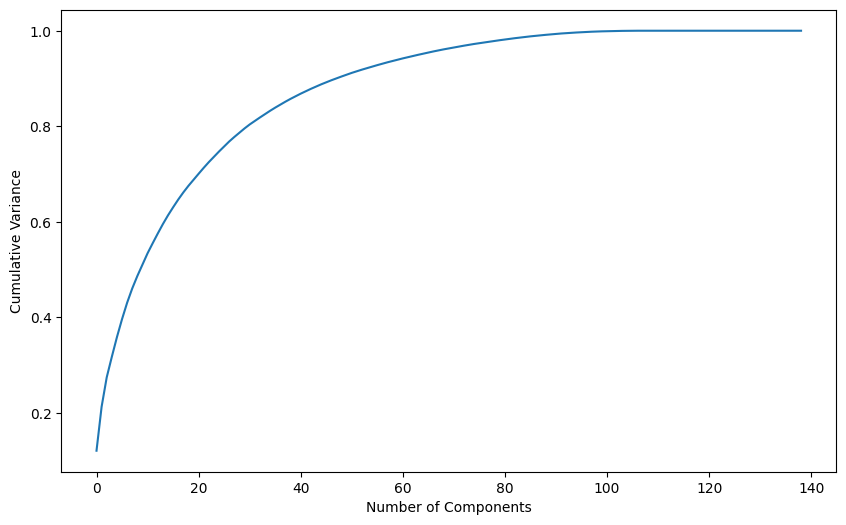

In [98]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

60 components explain almost 90% or more than 90% of variance of the data. So, we can perform PCA with 60 components.

In [99]:
#import incremenatl PCA
from sklearn.decomposition import IncrementalPCA

In [100]:
#instantiate object
pca_final = IncrementalPCA(n_components = 60)

In [101]:
#Fitting the train data
X_train_pca = pca_final.fit_transform(X_train)

In [102]:
X_train_pca.shape

(37862, 60)

In [103]:
#Transforming the test data
X_test_pca = pca_final.transform(X_test)

#### Logistic Regression with PCA

In [104]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [105]:
#Creating K -folds with 5 split
folds = KFold(n_splits = 5 , shuffle = True , random_state = 4)
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV( estimator = LogisticRegression() , param_grid = params , scoring = 'recall' , cv = folds , verbose = 1  , return_train_score = True)

#fit the model

model_cv.fit(X_train_pca , y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [106]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.272351,0.037466,0.005901,0.001011,0.01,{'C': 0.01},0.897861,0.897300,0.889571,0.897869,0.902516,0.897023,0.004176,6,0.898229,0.899690,0.900408,0.896771,0.898114,0.898643,0.001278
1,0.350879,0.052030,0.007817,0.003716,0.10,{'C': 0.1},0.900535,0.899418,0.892505,0.898909,0.905136,0.899300,0.004048,3,0.899414,0.900614,0.901133,0.897567,0.899371,0.899620,0.001233
2,0.335840,0.029944,0.005651,0.000764,1.00,{'C': 1},0.900535,0.899153,0.892771,0.898129,0.905136,0.899145,0.003987,5,0.899217,0.900416,0.900935,0.897699,0.900165,0.899687,0.001139
3,0.409831,0.074365,0.005842,0.000824,10.00,{'C': 10},0.900535,0.899418,0.892238,0.898909,0.905660,0.899352,0.004290,2,0.899085,0.900218,0.900804,0.897699,0.900430,0.899647,0.001130
4,0.393661,0.042901,0.006336,0.000903,100.00,{'C': 100},0.900535,0.899418,0.892505,0.898909,0.905398,0.899353,0.004124,1,0.899151,0.900218,0.900804,0.897699,0.900430,0.899660,0.001124
5,0.377236,0.016091,0.007771,0.001455,1000.00,{'C': 1000},0.900535,0.899418,0.892505,0.897869,0.905398,0.899145,0.004167,4,0.899217,0.900218,0.900804,0.897235,0.900430,0.899581,0.001285


##### Logistic regression with optimal C

In [107]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

best_C

100

In [108]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [109]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [110]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15868  3063]
 [ 1896 17035]]


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Accuracy
metrics.accuracy_score(y_train, y_train_pred)

0.8690243515926258

In [114]:
# Sensitivity
TP / float(TP+FN)

np.float64(0.8998468121071259)

In [115]:
# Specificity
TN / float(TN+FP)

np.float64(0.8382018910781258)

##### Pridiction on test data

In [116]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6817 1294]
 [  63  224]]


In [118]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
#Calculate  Accuracy
metrics.accuracy_score(y_test, y_test_pred)

0.8384139080733508

In [120]:
# Calculate Sensitivity
TP / float(TP+FN)

np.float64(0.7804878048780488)

In [121]:
# Calculate Specificity
TN / float(TN+FP)

np.float64(0.8404635679940821)

In [122]:
# Calculate Precision

TP/(TP+FP)

np.float64(0.14756258234519104)

In [119]:
# Calculate Recall

TP/(TP+FN)

np.float64(0.7804878048780488)

The model is performing well as there is not much difference between the accuracy , senstivity , specificity for the train and  test data

#### Decision tree with PCA

In [127]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [128]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [129]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.360410,0.409741,0.013533,0.007818,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.923666,0.933985,0.927628,0.923666,0.923666,0.926522,0.004034,1
1,2.957763,0.737847,0.007927,0.004261,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.923666,0.933985,0.927628,0.923666,0.923666,0.926522,0.004034,1
2,2.058458,0.048044,0.007397,0.001009,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923666,0.934513,0.928420,0.917591,0.921817,0.925202,0.005810,3
3,1.974420,0.072390,0.006082,0.000562,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923666,0.934513,0.928420,0.917591,0.921817,0.925202,0.005810,3
4,3.450201,0.153932,0.010964,0.005387,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.891706,0.907314,0.909403,0.900687,0.895140,0.900850,0.006800,5
5,3.679162,0.385910,0.006898,0.001392,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.891706,0.907314,0.909403,0.900687,0.895140,0.900850,0.006800,5
6,3.204262,0.132176,0.008754,0.004927,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.893555,0.895432,0.884311,0.877443,0.891442,0.888437,0.006664,7
7,3.203644,0.092124,0.007647,0.002763,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.893555,0.895432,0.884311,0.877443,0.891442,0.888437,0.006664,7


In [130]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9265222406400186
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [131]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [132]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16710  2221]
 [ 1452 17479]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9029898050816122
Sensitivity:- 0.9233004067402673
Specificity:- 0.882679203422957


##### Prediction on the test set

In [136]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7024 1087]
 [ 102  185]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8584186711121695
Sensitivity:- 0.6445993031358885
Specificity:- 0.8659844655406238


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Random forest with PCA

In [140]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [141]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [142]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8624215554342575 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


##### Model with optimal hyperparameters

In [143]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [144]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [145]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15826  3105]
 [ 1899 17032]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.867835824837568
Sensitivity:- 0.8996883418731182
Specificity:- 0.8359833078020179


##### Prediction on the test set

In [149]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6773 1338]
 [  76  211]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8316265777566088
Sensitivity:- 0.735191637630662
Specificity:- 0.8350388361484404


#### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

### MODEL BUILDING WITHOUT PCA

#### Logistic Regression

In [153]:
import statsmodels.api as sm

x = sm.add_constant(X_train)
log_reg = sm.GLM(y_train, x, family=sm.families.Binomial())
log_reg = log_reg.fit().summary()
log_reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37729
Model Family:                Binomial   Df Model:                          132
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Sep 2024   Deviance:                   1.2581e+05
Time:                        03:02:18   Pearson chi2:                 6.15e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.445e+15   5.24e+05   2.76e+09      0.000    1.45e+15    1.45e+15
arpu_6                     -1.947e+12   1.26e+06  -1.54e+06      0.000   -1.95e+12   -1.95e+12
arpu_7                      4.929e+12   1.29e+06   3.81e+06      0.000    4.93e+12    4.93e+12
arpu_8                     -5.123e+13   1.81e+06  -2.83e+07      0.000   -5.12e+13   -5.12e+13
onnet_mou_6                 2.261e+14   4.17e+07   5.42e+06      0.000    2.26e+14    2.26e+14
onnet_mou_7                -3.183e+14   3.43e+07  -9.29e+06      0.000   -3.18e+14   -3.18e+14
onnet_mou_8                -4.119e+14   2.23e+07  -1.85e+07      0.000   -4.12e+14   -4.12e+14
offnet_mou_6                1.507e+14   3.68e+07    4.1e+06      0.000    1.51e+14    1.51e+14
offnet_mou_7                 2.01e+13   2.91e+07    6.9e+05      0.000    2.01e+13    2.01e+13
offnet_mou_8               -5.536e+14   1.98e+07  -2.79e+07      0.000   -5.54e+14   -5.54e+14
roam_ic_mou_6                1.81e+13   6.74e+05   2.69e+07      0.000    1.81e+13    1.81e+13
roam_ic_mou_7               1.325e+13   7.83e+05   1.69e+07      0.000    1.32e+13    1.32e+13
roam_ic_mou_8               -1.14e+12   7.07e+05  -1.61e+06      0.000   -1.14e+12   -1.14e+12
roam_og_mou_6              -5.482e+13   1.16e+07  -4.74e+06      0.000   -5.48e+13   -5.48e+13
roam_og_mou_7                2.94e+13   8.94e+06   3.29e+06      0.000    2.94e+13    2.94e+13
roam_og_mou_8                1.89e+14   7.37e+06   2.57e+07      0.000    1.89e+14    1.89e+14
loc_og_t2t_mou_6           -5.006e+17   1.28e+10  -3.91e+07      0.000   -5.01e+17   -5.01e+17
loc_og_t2t_mou_7                5e+17   1.37e+10   3.66e+07      0.000       5e+17       5e+17
loc_og_t2t_mou_8            8.631e+17   1.33e+10   6.48e+07      0.000    8.63e+17    8.63e+17
loc_og_t2m_mou_6           -5.299e+17   1.36e+10  -3.91e+07      0.000    -5.3e+17    -5.3e+17
loc_og_t2m_mou_7            4.755e+17    1.3e+10   3.66e+07      0.000    4.76e+17    4.76e+17
loc_og_t2m_mou_8            9.065e+17    1.4e+10   6.48e+07      0.000    9.06e+17    9.06e+17
loc_og_t2f_mou_6           -4.466e+16   1.14e+09  -3.91e+07      0.000   -4.47e+16   -4.47e+16
loc_og_t2f_mou_7            4.306e+16   1.18e+09   3.66e+07      0.000    4.31e+16    4.31e+16
loc_og_t2f_mou_8            7.574e+16   1.17e+09   6.47e+07      0.000    7.57e+16    7.57e+16
loc_og_t2c_mou_6            5.126e+12   4.72e+05   1.09e+07      0.000    5.13e+12    5.13e+12
loc_og_t2c_mou_7           -2.499e+12   4.88e+05  -5.12e+06      0.000    -2.5e+12    -2.5e+12
loc_og_t2c_mou_8           -9.501e+11   4.42e+05  -2.15e+06      0.000    -9.5e+11    -9.5e+11
loc_og_mou_6                 4.68e+17   2.58e+10   1.81e+07      0.000    4.68e+17    4.68e+17
loc_og_mou_7               -6.593e+17   2.7

**Insights:**
* There are features with positive coefficients and few features have negative coefficients.
* Features that have higher p-values are insignificant in the model.

**Feature Elimination Strategy:**
* We'll first eliminate a few features using Recursive Feature Elimination (RFE).
* We'll later use manual feature elimination (i.e. manually eliminating features based insignificant p-values and VIFs).

#### Feature Selection Using RFE

In [154]:
# Intantiate the logistic regression
logreg = LogisticRegression()

In [118]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the model with training dataset
rfe = rfe.fit(X_train, y_train)

In [119]:
# Print the columns selected by RFE and their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 102),
 ('arpu_7', False, 67),
 ('arpu_8', False, 10),
 ('onnet_mou_6', False, 81),
 ('onnet_mou_7', False, 27),
 ('onnet_mou_8', False, 20),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', False, 5),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 36),
 ('roam_ic_mou_7', False, 111),
 ('roam_ic_mou_8', False, 31),
 ('roam_og_mou_6', False, 74),
 ('roam_og_mou_7', False, 87),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 71),
 ('loc_og_t2t_mou_7', False, 28),
 ('loc_og_t2t_mou_8', False, 29),
 ('loc_og_t2m_mou_6', False, 80),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_6', False, 114),
 ('loc_og_t2f_mou_7', False, 113),
 ('loc_og_t2f_mou_8', False, 41),
 ('loc_og_t2c_mou_6', False, 84),
 ('loc_og_t2c_mou_7', False, 76),
 ('loc_og_t2c_mou_8', False, 56),
 ('loc_og_mou_6', False, 100),
 ('loc_og_mou_7', False, 73),
 ('loc_og_mou_8', False, 97),
 ('std_og_t2t_mou_6', False, 37),
 ('std_og_t2t_mou_7', False, 26),
 (

##### Generic function to build the model using statsmodels.api

In [120]:
def build_model(dataframe):
    X_train_sm = sm.add_constant(dataframe)
    lm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    lm = lm.fit()
    print("Logistic Regression Model is : \n", lm.summary())
    return lm

##### Generic function to calculate VIF(Variance Inflation Factor)

In [121]:
def calculate_vif(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Feature selected/not selected by RFE

In [122]:
# Printing and saving the features selected by RFE

X_train_cols = X_train.columns[rfe.support_]
X_train_cols

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'monthly_2g_8', 'monthly_3g_8',
       'decrease_mou_action', 'good_phase_rech_num',
       'decrease_rech_num_action', 'decrease_vbc_action'],
      dtype='object')

In [123]:
# Print the features not selected by RFE
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'avg_rech_amt_good', 'diff_rech_amt', 'decrease_rech_amt_action',
       'total_mou_good_phase', 'avg_mou_good', 'total_mou_action',
       'good_phase_arpu', 'arpu_decrease_action_phase', 'avg_vbc_3g_good',
       'diff_vbc'],
      dtype='object', length=124)

In [124]:
# Creating new dataframe to save the data for the features selected by RFE
X_train_rfe = X_train[X_train_cols]

In [125]:
# Printing the shape of X_train_rfe
X_train_rfe.shape

(37862, 15)

In [126]:
X_train_rfe.columns

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'monthly_2g_8', 'monthly_3g_8',
       'decrease_mou_action', 'good_phase_rech_num',
       'decrease_rech_num_action', 'decrease_vbc_action'],
      dtype='object')

#### Model 1 with RFE selected columns

In [127]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37846
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Sep 2024   Deviance:                       4632.2
Time:                        13:51:39   Pearson chi2:                 4.03e+05
No. Iterations:                    73   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

,Features,VIF
12,good_phase_rech_num,1114.85
7,total_rech_num_6,353.06
8,total_rech_num_7,321.62
0,offnet_mou_8,4.67
2,std_og_t2m_mou_8,4.33
11,decrease_mou_action,1.60
13,decrease_rech_num_action,1.45
14,decrease_vbc_action,1.28
1,roam_og_mou_8,1.17
10,monthly_3g_8,1.13


#### Model 2- Dropping column 'og_others_8' from X_train_rfe as it has very high value of p.

In [128]:
X_train_rfe.drop(['og_others_8'], axis=1, inplace=True)

In [129]:
# Check the detail after dropping the column
X_train_rfe.head()

,offnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,monthly_2g_8,monthly_3g_8,decrease_mou_action,good_phase_rech_num,decrease_rech_num_action,decrease_vbc_action
0,-0.723858,-0.378757,-0.434107,-0.209877,-0.239204,-0.070874,-1.053264,-0.789517,-0.231135,2.036347,1,-1.040433,0,1
1,0.215108,-0.250644,-0.426220,0.418196,-0.019413,-0.070874,-0.393021,-0.559697,-0.231135,-0.215608,1,-0.547606,0,0
2,0.835005,-0.378757,1.262276,-0.343556,-0.257128,-0.070874,-0.282981,2.427962,-0.231135,-0.215608,1,1.115685,0,0
3,4.455251,-0.378757,-0.434107,0.399440,-0.257128,-0.070874,0.157182,0.704313,-0.231135,2.036347,1,0.438048,0,0
4,-0.007863,-0.378757,-0.170846,-0.101859,-0.231270,3.254435,0.267222,-0.214967,3.445853,-0.215608,0,0.006824,0,1


In [130]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37847
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2319.0
Date:                Sat, 14 Sep 2024   Deviance:                       4637.9
Time:                        13:51:43   Pearson chi2:                 4.07e+05
No. Iterations:                    68   Pseudo R-squ. (CS):             0.7174
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

,Features,VIF
11,good_phase_rech_num,1114.69
6,total_rech_num_6,353.01
7,total_rech_num_7,321.56
0,offnet_mou_8,4.67
2,std_og_t2m_mou_8,4.33
10,decrease_mou_action,1.60
12,decrease_rech_num_action,1.45
13,decrease_vbc_action,1.28
1,roam_og_mou_8,1.17
9,monthly_3g_8,1.13


#### Model 3 - Dropping column 'good_phase_rech_num' from X_train_rfe as this has a very haigh value of VIF.

In [131]:
X_train_rfe.drop(['good_phase_rech_num'], axis=1, inplace=True)

In [132]:
# Check the detail after dropping the column
X_train_rfe.head()

,offnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,monthly_2g_8,monthly_3g_8,decrease_mou_action,decrease_rech_num_action,decrease_vbc_action
0,-0.723858,-0.378757,-0.434107,-0.209877,-0.239204,-0.070874,-1.053264,-0.789517,-0.231135,2.036347,1,0,1
1,0.215108,-0.250644,-0.426220,0.418196,-0.019413,-0.070874,-0.393021,-0.559697,-0.231135,-0.215608,1,0,0
2,0.835005,-0.378757,1.262276,-0.343556,-0.257128,-0.070874,-0.282981,2.427962,-0.231135,-0.215608,1,0,0
3,4.455251,-0.378757,-0.434107,0.399440,-0.257128,-0.070874,0.157182,0.704313,-0.231135,2.036347,1,0,0
4,-0.007863,-0.378757,-0.170846,-0.101859,-0.231270,3.254435,0.267222,-0.214967,3.445853,-0.215608,0,0,1


In [133]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37848
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13191.
Date:                Sat, 14 Sep 2024   Deviance:                       26382.
Time:                        13:51:44   Pearson chi2:                 3.34e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4982
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

,Features,VIF
0,offnet_mou_8,4.50
2,std_og_t2m_mou_8,4.24
7,total_rech_num_7,1.87
6,total_rech_num_6,1.82
10,decrease_mou_action,1.58
11,decrease_rech_num_action,1.43
12,decrease_vbc_action,1.27
1,roam_og_mou_8,1.13
9,monthly_3g_8,1.12
3,loc_ic_t2t_mou_8,1.09


#### Model 4 - Dropping column 'total_rech_num_7' from X_train_rfe as this is insignificant due to its high p-value.

In [134]:
X_train_rfe.drop(['total_rech_num_7'], axis=1, inplace=True)

In [135]:
# Check the detail after dropping the column
X_train_rfe.head()

,offnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,ic_others_8,total_rech_num_6,monthly_2g_8,monthly_3g_8,decrease_mou_action,decrease_rech_num_action,decrease_vbc_action
0,-0.723858,-0.378757,-0.434107,-0.209877,-0.239204,-0.070874,-1.053264,-0.231135,2.036347,1,0,1
1,0.215108,-0.250644,-0.426220,0.418196,-0.019413,-0.070874,-0.393021,-0.231135,-0.215608,1,0,0
2,0.835005,-0.378757,1.262276,-0.343556,-0.257128,-0.070874,-0.282981,-0.231135,-0.215608,1,0,0
3,4.455251,-0.378757,-0.434107,0.399440,-0.257128,-0.070874,0.157182,-0.231135,2.036347,1,0,0
4,-0.007863,-0.378757,-0.170846,-0.101859,-0.231270,3.254435,0.267222,3.445853,-0.215608,0,0,1


In [136]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37849
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13191.
Date:                Sat, 14 Sep 2024   Deviance:                       26382.
Time:                        13:51:46   Pearson chi2:                 3.36e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4982
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

,Features,VIF
0,offnet_mou_8,4.49
2,std_og_t2m_mou_8,4.23
9,decrease_mou_action,1.58
10,decrease_rech_num_action,1.43
11,decrease_vbc_action,1.27
1,roam_og_mou_8,1.13
8,monthly_3g_8,1.12
3,loc_ic_t2t_mou_8,1.09
4,loc_ic_t2f_mou_8,1.09
7,monthly_2g_8,1.09


#### Inference

We can select **Model 4** as the final Logistic Regression Model because of the below reasons:

* The p-values for all features is either 0 or less than 0.05
* The value of VIF is in accepted range, i.e all values are less than 5.

#### Final model after RFE

In [137]:
# Print the final features remaining after RFE
X_train_rfe.columns

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_6', 'monthly_2g_8',
       'monthly_3g_8', 'decrease_mou_action', 'decrease_rech_num_action',
       'decrease_vbc_action'],
      dtype='object')

In [138]:
# We will build the final model using these features
X_train_sm = sm.add_constant(X_train_rfe)
lm_final = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lm_final = lm_final.fit()
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37849
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13191.
Date:                Sat, 14 Sep 2024   Deviance:                       26382.
Time:                        13:51:47   Pearson chi2:                 3.36e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4982
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2913      0.030     -9.679      0.000      -0.350      -0.232
offnet_mou_8                -3.0796      0.086    -35.769      0.000      -3.248      -2.911
roam_og_mou_8                1.5873      0.038     42.230      0.000       1.514       1.661
std_og_t2m_mou_8             2.6060      0.075     34.520      0.000       2.458       2.754
loc_ic_t2t_mou_8            -1.4258      0.066    -21.462      0.000      -1.556      -1.296
loc_ic_t2f_mou_8            -1.1149      0.066    -16.878      0.000      -1.244      -0.985
ic_others_8                 -2.4061      0.215    -11.217      0.000      -2.827      -1.986
total_rech_num_6            -0.1302      0.014     -9.148      0.000      -0.158      -0.102
monthly_2g_8                -1.0145      0.059    -17.229      0.000      -1.130      -0.899
monthly_3g_8                -0.8611      0.046    -18.838      0.000      -0.951      -0.772
decrease_mou_action         -1.4515      0.048    -30.376      0.000      -1.545      -1.358
decrease_rech_num_action    -1.7111      0.052    -32.755      0.000      -1.814      -1.609
decrease_vbc_action         -2.0982      0.123    -17.000      0.000      -2.340      -1.856
============================================================================================
"""

#### MODEL PERFORMANCE WITHOUT PCA

In [139]:
# Getting the predicted value on the train set
y_train_pred_no_pca = lm_final.predict(X_train_sm)
y_train_pred_no_pca.head()

0    1.816876e-02
1    2.090669e-02
2    4.447426e-01
3    6.525558e-09
4    6.916802e-07
dtype: float64

In [140]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readability
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,1.816876e-02,0
1,0,2.090669e-02,1
2,0,4.447426e-01,2
3,0,6.525558e-09,3
4,0,6.916802e-07,4


#### Finding Optimal Probablity Cutoff Point

In [141]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.816876e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,2.090669e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,4.447426e-01,2,1,1,1,1,1,0,0,0,0,0
3,0,6.525558e-09,3,1,0,0,0,0,0,0,0,0,0
4,0,6.916802e-07,4,1,0,0,0,0,0,0,0,0,0


#### Calculate the accuracy, sensitivity and specificity for various probability cutoffs.

In [142]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.771988     0.977444     0.566531
0.2          0.2  0.811447     0.962707     0.660187
0.3          0.3  0.831916     0.950610     0.713222
0.4          0.4  0.850325     0.934816     0.765834
0.5          0.5  0.863319     0.911996     0.814643
0.6          0.6  0.865406     0.883630     0.847182
0.7          0.7  0.863742     0.842903     0.884581
0.8          0.8  0.834451     0.724526     0.944377
0.9          0.9  0.590592     0.192647     0.988537


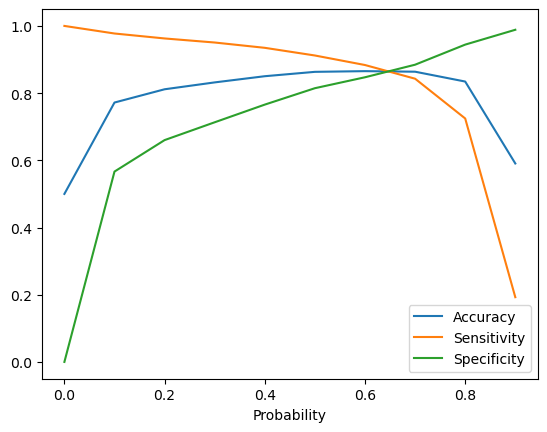

In [143]:
# Plotting Accuracy, Sensitivity and Specificity for different probabilities.
cutoff_df.plot('Probability', ['Accuracy','Sensitivity','Specificity'])
plt.show()

**Insights:**
At point 0.65 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Though as per the above curve, we should take 0.65 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [144]:
# Creating a column with name "Predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,1.816876e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,2.090669e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,4.447426e-01,2,1,1,1,1,1,0,0,0,0,0,0
3,0,6.525558e-09,3,1,0,0,0,0,0,0,0,0,0,0
4,0,6.916802e-07,4,1,0,0,0,0,0,0,0,0,0,0


#### Metrics

In [145]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
print("Confusion matrix is:\n", confusion)

Confusion matrix is:
 [[15422  3509]
 [ 1666 17265]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
print('Accuracy is :', accuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity is:", sensitivity)

# Specificity
specificity = TN / float(TN+FP)
print("Specificity is:", specificity)

Accuracy is : 0.8633194231683482
Sensitivity is: 0.9119961967143838
Specificity is: 0.8146426496223126


**Insights:**
We have got good accuracy, sensitivity and specificity on the train set prediction.

#### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [148]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

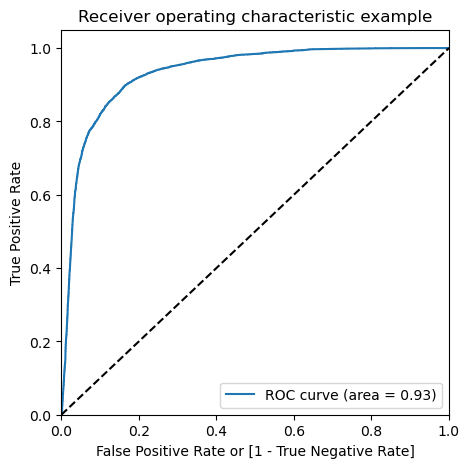

In [149]:
draw_roc(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

We can see the area of the ROC curve is closer to 1

#### Testing the model on the test set

In [150]:
# Making a copy of the test set
X_test_log = X_test.copy()

In [151]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[X_train_rfe.columns]

In [152]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [153]:
# Predict on the test set
y_test_pred = lm_final.predict(X_test_sm)

In [154]:
y_test_pred.head()

7634     0.696311
40466    0.069274
53854    0.053287
95060    0.001171
92802    0.780191
dtype: float64

In [155]:
# Converting y_test_pred to a dataframe
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
7634,0.696311
40466,0.069274
53854,0.053287
95060,0.001171
92802,0.780191


In [156]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
7634,0
40466,0
53854,0
95060,0
92802,0


In [157]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [158]:
# Removing index form the both dataframes for merging them side by side
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred], axis=1)

In [160]:
y_test_pred_final.head()

,churn,CustID,0
0,0,7634,0.696311
1,0,40466,0.069274
2,0,53854,0.053287
3,0,95060,0.001171
4,0,92802,0.780191


In [161]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'Churn_Prob'})

In [162]:
y_test_pred_final.head()

,churn,CustID,Churn_Prob
0,0,7634,0.696311
1,0,40466,0.069274
2,0,53854,0.053287
3,0,95060,0.001171
4,0,92802,0.780191


In [163]:
# In the test set using probablity cutoff 0.5
y_test_pred_final['Test_Predicted'] = y_test_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [164]:
y_test_pred_final.head()

,churn,CustID,Churn_Prob,Test_Predicted
0,0,7634,0.696311,1
1,0,40466,0.069274,0
2,0,53854,0.053287,0
3,0,95060,0.001171,0
4,0,92802,0.780191,1


#### Metrics

In [165]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['Test_Predicted'])
print("The confusion matrix is:\n", confusion)

The confusion matrix is:
 [[6618 1493]
 [  64  223]]


In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Accuracy
accuracy = metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['Test_Predicted'])
print("Accuracy is:", accuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity is: ", TP / float(TP+FN))

# Specificity
specificity = TN / float(TN+FP)
print("Specificity is: ", TN / float(TN+FP))

Accuracy is: 0.8145987139795189
Sensitivity is:  0.7770034843205574
Specificity is:  0.8159289853285662


**Model summary**

**Train set**
Accuracy = 0.86
Sensitivity = 0.91
Specificity = 0.81

**Test set**
Accuracy = 0.81
Sensitivity = 0.78
Specificity = 0.82

Overall, the model is performing well in the test set, what it had learnt from the train set.

### RECOMMENDATIONS

#### Top predictors

Below are few top variables selected in the logistic regression model.

In [168]:
lm_final.params.sort_values()

offnet_mou_8               -3.079624
ic_others_8                -2.406131
decrease_vbc_action        -2.098211
decrease_rech_num_action   -1.711123
decrease_mou_action        -1.451506
loc_ic_t2t_mou_8           -1.425763
loc_ic_t2f_mou_8           -1.114945
monthly_2g_8               -1.014499
monthly_3g_8               -0.861110
const                      -0.291251
total_rech_num_6           -0.130176
roam_og_mou_8               1.587335
std_og_t2m_mou_8            2.606010
dtype: float64

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

#### Recommendations

* roam_og_mou_8 and std_og_t2m_mou_8 variables have positive coefficients (1.587335 and 2.606010 respectively). That means for the customers, whose roaming and std outgoing minutes of usage is increasing are more likely to churn.
* If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.